 →  →  →  →  ↓ 
 ↑  #  →  →  ↓ 
 →  →  #  →  ↓ 
 →  →  →  ↑  ↓ 
 →  →  →  →  G 


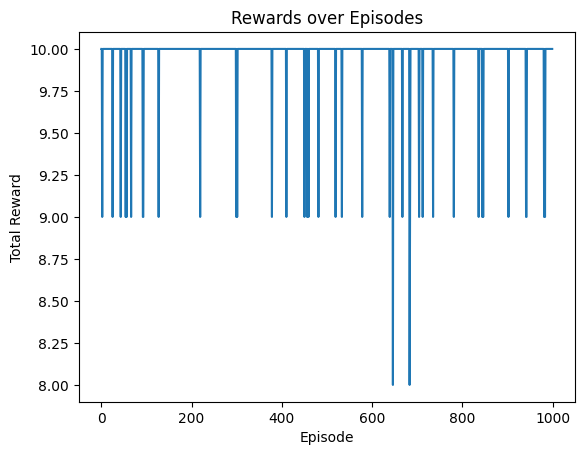

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define Gridworld Environment
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.goal = (size-1, size-1)
        self.obstacles = [(1, 1), (2, 2)]
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # right, left, down, up
        self.num_actions = len(self.actions)
        self.reset()

    def reset(self):
        self.agent_pos = (0, 0)

    def step(self, action):
        dx, dy = self.actions[action]
        new_x = min(max(self.agent_pos[0] + dx, 0), self.size - 1)
        new_y = min(max(self.agent_pos[1] + dy, 0), self.size - 1)
        if (new_x, new_y) in self.obstacles:
            reward = -1
        elif (new_x, new_y) == self.goal:
            reward = 10
        else:
            reward = 0
        self.agent_pos = (new_x, new_y)
        done = (new_x, new_y) == self.goal
        return (new_x, new_y), reward, done

#Bellman Equations
class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((env.size, env.size, env.num_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.num_actions)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_table(self, state, action, reward, next_state):
        old_value = self.q_table[state[0], state[1], action]
        next_max = np.max(self.q_table[next_state[0], next_state[1]])
        new_value = old_value + self.alpha * (reward + self.gamma * next_max - old_value)
        self.q_table[state[0], state[1], action] = new_value

# Train the Agent
def train_agent(env, agent, episodes=1000):
    rewards = []
    for episode in range(episodes):
        state = env.agent_pos
        total_reward = 0
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.update_q_table(state, action, reward, next_state)
            total_reward += reward
            state = next_state
        rewards.append(total_reward)
        env.reset()
    return rewards

# Visualize Learned Policy
def visualize_policy(env, agent):
    policy = np.argmax(agent.q_table, axis=2)
    for i in range(env.size):
        for j in range(env.size):
            if (i, j) == env.goal:
                print(" G ", end="")
            elif (i, j) in env.obstacles:
                print(" # ", end="")
            else:
                action = policy[i, j]
                if action == 0:
                    print(" → ", end="")
                elif action == 1:
                    print(" ← ", end="")
                elif action == 2:
                    print(" ↓ ", end="")
                elif action == 3:
                    print(" ↑ ", end="")
        print()

# Define environment and agent
env = GridWorld()
agent = QLearningAgent(env)

# Train the agent
rewards = train_agent(env, agent)

# Visualize learned policy
visualize_policy(env, agent)

# Plot rewards over episodes
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes')
plt.show()


 →  →  →  →  ↓ 
 ↑  #  →  →  ↓ 
 →  ←  #  →  ↓ 
 →  →  →  →  ↓ 
 →  →  →  →  G 


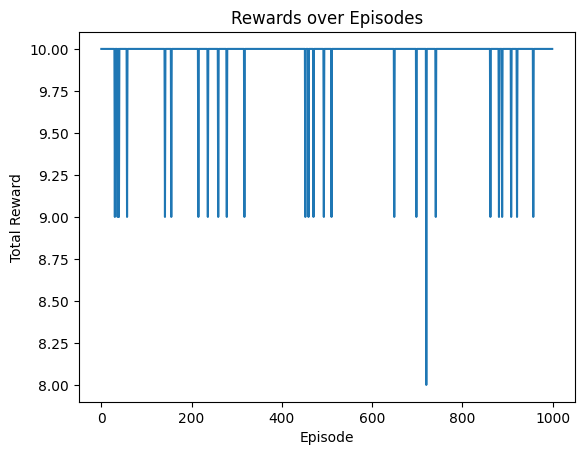

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define Gridworld Environment with MDP
class GridWorldMDP:
    def __init__(self, size=5):
        self.size = size
        self.goal = (size-1, size-1)
        self.obstacles = [(1, 1), (2, 2)]
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # right, left, down, up
        self.num_actions = len(self.actions)
        self.transition_prob = 0.8  # probability of transition to intended state
        self.reward_map = np.zeros((size, size))
        self.reward_map[self.goal] = 10
        for obstacle in self.obstacles:
            self.reward_map[obstacle] = -1
        self.agent_pos = (0, 0)  # Initialize agent position

    def reset(self):
        self.agent_pos = (0, 0)

    def step(self, action):
        dx, dy = self.actions[action]
        new_x = min(max(self.agent_pos[0] + dx, 0), self.size - 1)
        new_y = min(max(self.agent_pos[1] + dy, 0), self.size - 1)
        reward = self.reward_map[new_x, new_y]
        self.agent_pos = (new_x, new_y)
        done = (new_x, new_y) == self.goal
        return (new_x, new_y), reward, done

# Q-Learning with MDP and Bellman Equations
class QLearningMDPAgent:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((env.size, env.size, env.num_actions))
        self.agent_pos = (0, 0)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.num_actions)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_table(self, state, action, reward, next_state):
        old_value = self.q_table[state[0], state[1], action]
        next_max = np.max(self.q_table[next_state[0], next_state[1]])
        new_value = old_value + self.alpha * (reward + self.gamma * next_max - old_value)
        self.q_table[state[0], state[1], action] = new_value

# Train the Agent with MDP
def train_agent_mdp(env, agent, episodes=1000):
    rewards = []
    for episode in range(episodes):
        state = env.agent_pos
        total_reward = 0
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.update_q_table(state, action, reward, next_state)
            total_reward += reward
            state = next_state
        rewards.append(total_reward)
        env.reset()
    return rewards

# Visualize Learned Policy
def visualize_policy_mdp(env, agent):
    policy = np.argmax(agent.q_table, axis=2)
    for i in range(env.size):
        for j in range(env.size):
            if (i, j) == env.goal:
                print(" G ", end="")
            elif (i, j) in env.obstacles:
                print(" # ", end="")
            else:
                action = policy[i, j]
                if action == 0:
                    print(" → ", end="")
                elif action == 1:
                    print(" ← ", end="")
                elif action == 2:
                    print(" ↓ ", end="")
                elif action == 3:
                    print(" ↑ ", end="")
        print()

# Define environment and agent with MDP
env_mdp = GridWorldMDP()
agent_mdp = QLearningMDPAgent(env_mdp)

# Train the agent with MDP
rewards_mdp = train_agent_mdp(env_mdp, agent_mdp)

# Visualize learned policy
visualize_policy_mdp(env_mdp, agent_mdp)

# Plot rewards over episodes
plt.plot(rewards_mdp)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes')
plt.show()


 →  →  →  →  ↓ 
 ↑  #  →  →  ↓ 
 →  ←  #  →  ↓ 
 →  →  →  →  ↓ 
 →  →  →  →  G 


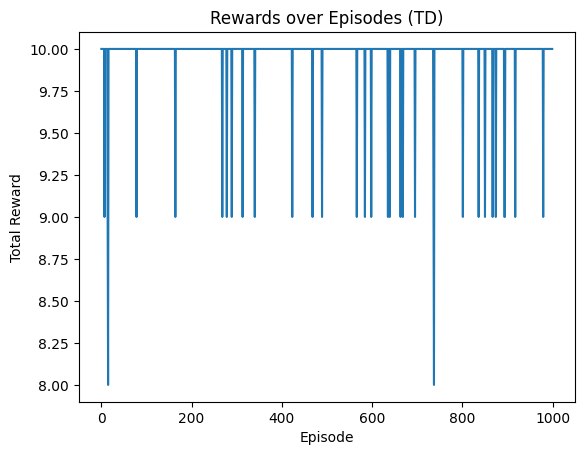

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define Gridworld Environment
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.goal = (size-1, size-1)
        self.obstacles = [(1, 1), (2, 2)]
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # right, left, down, up
        self.num_actions = len(self.actions)
        self.reset()

    def reset(self):
        self.agent_pos = (0, 0)

    def step(self, action):
        dx, dy = self.actions[action]
        new_x = min(max(self.agent_pos[0] + dx, 0), self.size - 1)
        new_y = min(max(self.agent_pos[1] + dy, 0), self.size - 1)
        if (new_x, new_y) in self.obstacles:
            reward = -1
        elif (new_x, new_y) == self.goal:
            reward = 10
        else:
            reward = 0
        self.agent_pos = (new_x, new_y)
        done = (new_x, new_y) == self.goal
        return (new_x, new_y), reward, done

# Q-Learning with Temporal Difference (TD)
class QLearningTDAgent:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((env.size, env.size, env.num_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.env.num_actions)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_table(self, state, action, reward, next_state):
        old_value = self.q_table[state[0], state[1], action]
        next_max = np.max(self.q_table[next_state[0], next_state[1]])
        td_target = reward + self.gamma * next_max
        td_error = td_target - old_value
        new_value = old_value + self.alpha * td_error
        self.q_table[state[0], state[1], action] = new_value

# Train the Agent with TD
def train_agent_td(env, agent, episodes=1000):
    rewards = []
    for episode in range(episodes):
        state = env.agent_pos
        total_reward = 0
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.update_q_table(state, action, reward, next_state)
            total_reward += reward
            state = next_state
        rewards.append(total_reward)
        env.reset()
    return rewards

# Visualize Learned Policy
def visualize_policy(env, agent):
    policy = np.argmax(agent.q_table, axis=2)
    for i in range(env.size):
        for j in range(env.size):
            if (i, j) == env.goal:
                print(" G ", end="")
            elif (i, j) in env.obstacles:
                print(" # ", end="")
            else:
                action = policy[i, j]
                if action == 0:
                    print(" → ", end="")
                elif action == 1:
                    print(" ← ", end="")
                elif action == 2:
                    print(" ↓ ", end="")
                elif action == 3:
                    print(" ↑ ", end="")
        print()

# Define environment and agent with TD
env_td = GridWorld()
agent_td = QLearningTDAgent(env_td)

# Train the agent with TD
rewards_td = train_agent_td(env_td, agent_td)

# Visualize learned policy
visualize_policy(env_td, agent_td)

# Plot rewards over episodes
plt.plot(rewards_td)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes (TD)')
plt.show()
